In [1]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.0MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 204kB 10.7MB/s 
     |████████████████████████████████| 1.2MB 14.4MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
from datetime import date


pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [4]:
today = date.today().strftime("%b%d_%y")
today

'May05_21'

## Download Titanic data from Kaggle

In [ ]:
# creds = '{"username":"mabelwang21","key":"148aad44f45250e46c8bf3e31f3de7a7"}'

In [ ]:
# cred_path = Path('~/.kaggle/kaggle.json').expanduser()
# if not cred_path.exists():
#     cred_path.parent.mkdir(exist_ok=True)
#     cred_path.write_text(creds)
#     cred_path.chmod(0o600)

In [5]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Kaggle/Titanic'

/content/gdrive/MyDrive/Colab Notebooks/Kaggle/Titanic


In [ ]:
# !kaggle competitions download -c titanic
# !mv *.csv 'data'

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
%ls -l data

total 92
-rw------- 1 root root  3258 Apr 29 19:16 gender_submission.csv
-rw------- 1 root root 28629 Apr 29 19:16 test.csv
-rw------- 1 root root 61194 Apr 29 19:16 train.csv


In [7]:
df = pd.read_csv('data/train.csv', low_memory=False)
df

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",...,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",...,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",...,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",...,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",...,111369,30.0000,C148,C


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 12)

## example of submission file

In [10]:
gender_submission = pd.read_csv("data/gender_submission.csv")
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe() # age and Cabin has missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


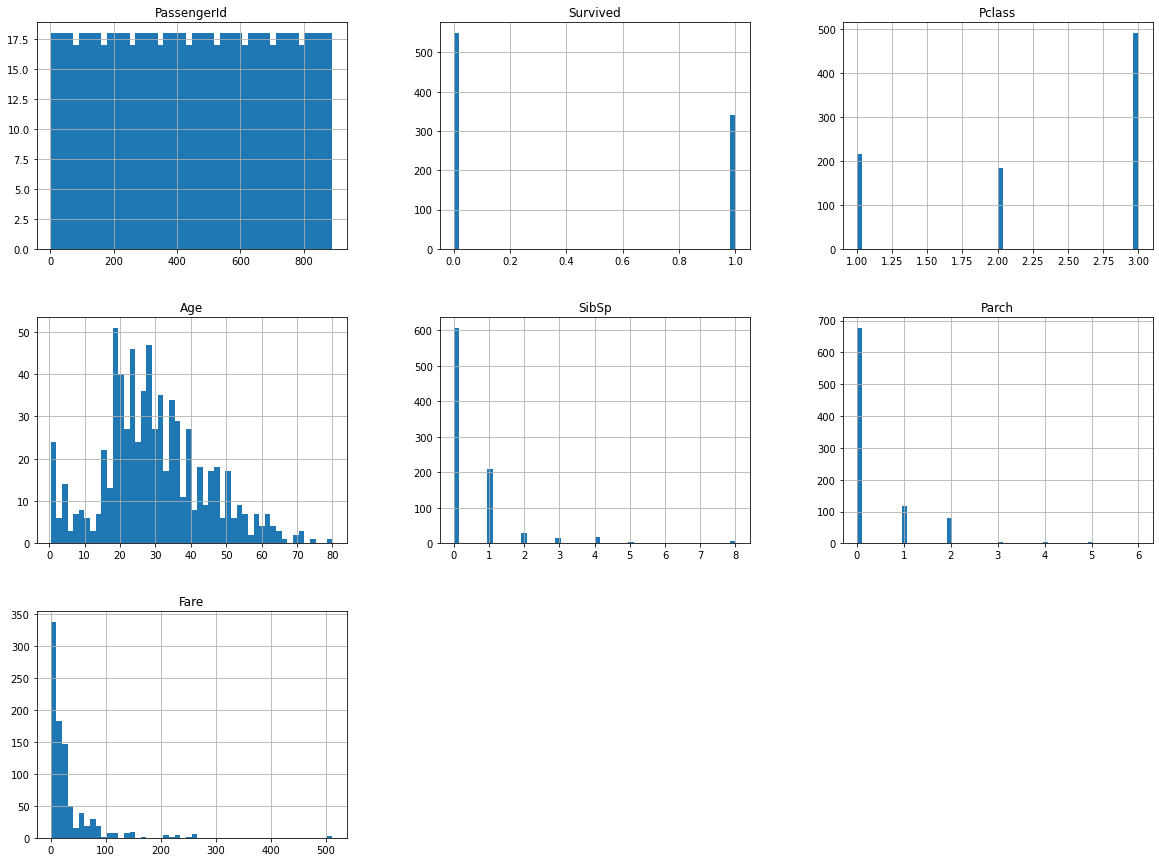

In [13]:
df.hist(bins =50, figsize=(20,15))
plt.show()

### Preprocessing

In [14]:
dep_var = "Survived"

In [57]:
procs = [Categorify, FillMissing(add_col=False)]

In [58]:
cont, cat = cont_cat_split(df,dep_var=dep_var)

In [59]:
cont

['PassengerId', 'Age', 'Fare']

In [60]:
cat

['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

In [61]:
pd.crosstab(df['Sex'], df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Provides train/val indices to split data in train/val sets
for train_index, val_index in split.split(df, df["Sex"]):
  splits = (list(train_index),list(val_index)) 

In [62]:
to = TabularPandas(df, procs=procs, cat_names=cat,cont_names=cont,y_names=dep_var,splits=splits)

In [63]:
len(to.train), len(to.valid)

(712, 179)

In [64]:
to.show(5)

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,PassengerId,Age,Fare,Survived
788,3,"Dean, Master. Bertram Vere",male,1,2,C.A. 2315,#na#,S,789,1.0,20.575001,1
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,#na#,S,348,28.0,16.100000,1
629,3,"O'Connell, Mr. Patrick D",male,0,0,334912,#na#,Q,630,28.0,7.733300,0
734,2,"Troupiansky, Mr. Moses Aaron",male,0,0,233639,#na#,S,735,23.0,13.000000,0
106,3,"Salkjelsvik, Miss. Anna Kristine",female,0,0,343120,#na#,S,107,21.0,7.650000,1


In [65]:
to.items.head(5)

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
788,789,1,3,209,...,549,20.575001,0,3
347,348,1,3,208,...,484,16.100000,0,3
629,630,0,3,603,...,287,7.733300,0,2
734,735,0,2,821,...,120,13.000000,0,3
106,107,1,3,725,...,297,7.650000,0,3


In [66]:
to.classes['Embarked']

['#na#', 'C', 'Q', 'S']

In [67]:
train_xs, train_y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

### Check missingness

In [68]:
df.isnull().sum() #check missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
train_xs.isnull().sum()

Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Cabin          0
Embarked       0
PassengerId    0
Age            0
Fare           0
dtype: int64

In [70]:
valid_xs.isnull().sum()

Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Cabin          0
Embarked       0
PassengerId    0
Age            0
Fare           0
dtype: int64

In [71]:
train_xs.columns

Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin',
       'Embarked', 'PassengerId', 'Age', 'Fare'],
      dtype='object')

In [72]:
valid_xs.columns

Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin',
       'Embarked', 'PassengerId', 'Age', 'Fare'],
      dtype='object')

### Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=25, max_depth = 3, max_features= 'log2',random_state=42) # 'auto' is sqrt(num_features)
dt_clf.fit(train_xs, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

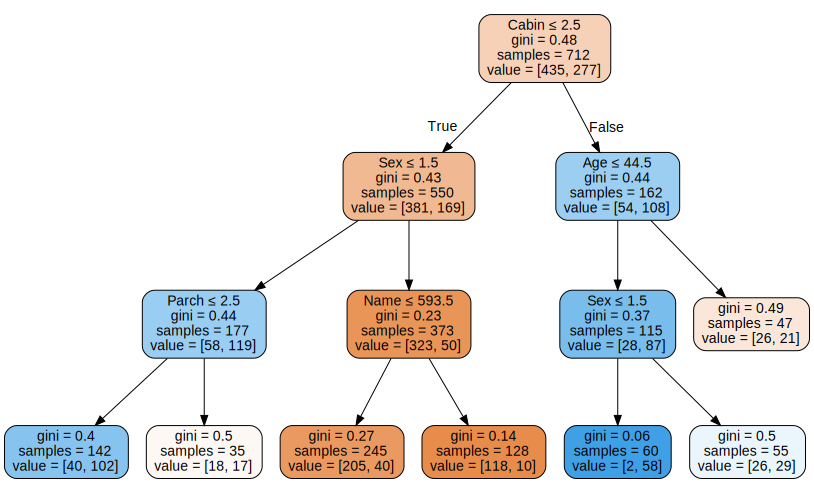

In [75]:
draw_tree(dt_clf, train_xs, size =14,precision=2)

In [76]:
dt_clf_y_pred = dt_clf.predict(valid_xs)
accuracy_score(valid_y,dt_clf_y_pred)

0.7486033519553073

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


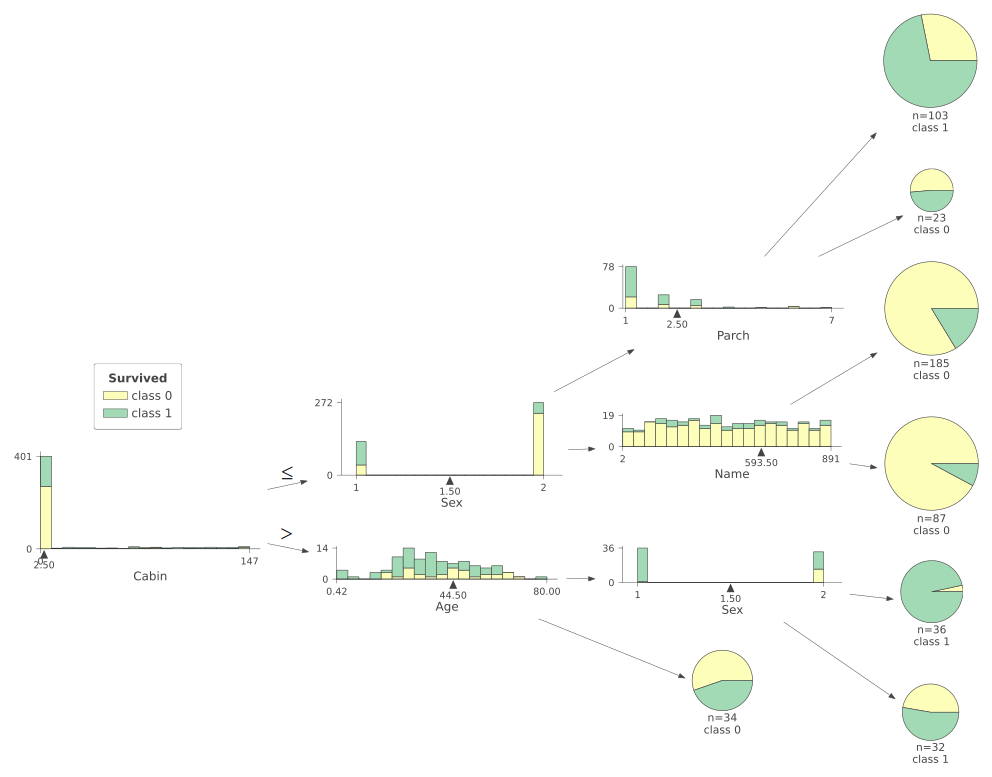

In [77]:
samp_idx = np.random.permutation(len(train_y))[:500]
dtreeviz(dt_clf, train_xs.iloc[samp_idx],train_y.iloc[samp_idx],train_xs.columns, dep_var, fontname='DejaVu Sans',
         scale =1.6, label_fontsize =10, orientation = 'LR')

In [78]:
dt_clf.get_n_leaves()

7

### Random Forest

In [412]:
def rf(xs, y, n_estimators=40, min_samples_leaf= 15, max_features=0.5, **kwargs):
  return RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,max_features=max_features,
                                n_jobs=-1, oob_score=True,random_state=42).fit(xs,y)

In [413]:
m = rf(train_xs, train_y)

In [414]:
m.oob_score_

0.8103932584269663

In [415]:
y_pred = m.predict(valid_xs)

In [416]:
accuracy_score(valid_y,y_pred)

0.8212290502793296

In [417]:
rf_clf_preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [418]:
rf_clf_preds.mean(0).shape

(179,)

In [419]:
rf_clf_preds.mean(0)

array([0.1  , 1.   , 0.025, 0.   , 0.   , 0.125, 0.175, 0.875, 0.975, 1.   , 0.1  , 0.   , 0.025, 0.   , 1.   , 0.   , 0.825, 0.025, 0.85 , 0.925, 0.35 , 0.925, 0.   , 0.   , 0.   , 1.   , 0.175,
       0.625, 0.925, 0.3  , 0.   , 0.025, 0.025, 0.025, 1.   , 0.2  , 0.75 , 0.   , 0.075, 0.025, 0.375, 0.975, 0.875, 1.   , 0.   , 0.05 , 0.825, 0.   , 0.075, 0.1  , 0.975, 0.975, 0.975, 0.   ,
       0.   , 1.   , 0.   , 0.6  , 0.975, 0.   , 0.   , 0.025, 0.425, 0.1  , 0.   , 0.425, 0.825, 0.5  , 0.   , 0.725, 0.375, 0.375, 0.   , 0.   , 0.   , 0.05 , 0.   , 0.025, 0.   , 0.05 , 0.1  ,
       0.925, 0.   , 0.775, 0.975, 0.025, 0.975, 0.6  , 0.7  , 0.1  , 0.025, 0.025, 0.   , 0.225, 0.   , 0.   , 0.525, 0.425, 0.   , 0.45 , 0.   , 0.   , 0.85 , 0.025, 0.   , 0.2  , 0.575, 0.   ,
       0.125, 0.025, 0.   , 0.425, 0.75 , 0.125, 0.2  , 0.325, 0.7  , 0.775, 0.   , 0.   , 0.   , 0.   , 0.1  , 0.9  , 0.075, 0.675, 0.375, 0.35 , 0.025, 0.025, 0.   , 0.4  , 0.95 , 0.075, 0.975,
       0.025, 0.   ,

In [420]:
rf_clf_preds_std = rf_clf_preds.std(0)
rf_clf_preds_std.max()

0.5

### Feature importance

In [421]:
def rf_feature_importance(clf, df):
  return pd.DataFrame({'cols': df.columns, 
                       'imp': clf.feature_importances_}).sort_values('imp',ascending = False)


In [422]:
def plot_fi(fi): return fi.plot('cols','imp', 'barh', figsize = (12,10), legend=False)

In [423]:
rf_fea_Imp = rf_feature_importance(m, train_xs)

In [424]:
rf_fea_Imp

,cols,imp
2,Sex,0.534977
6,Cabin,0.095452
5,Ticket,0.091483
10,Fare,0.087824
0,Pclass,0.064139
9,Age,0.040895
1,Name,0.032833
8,PassengerId,0.023568
3,SibSp,0.012127
7,Embarked,0.008745


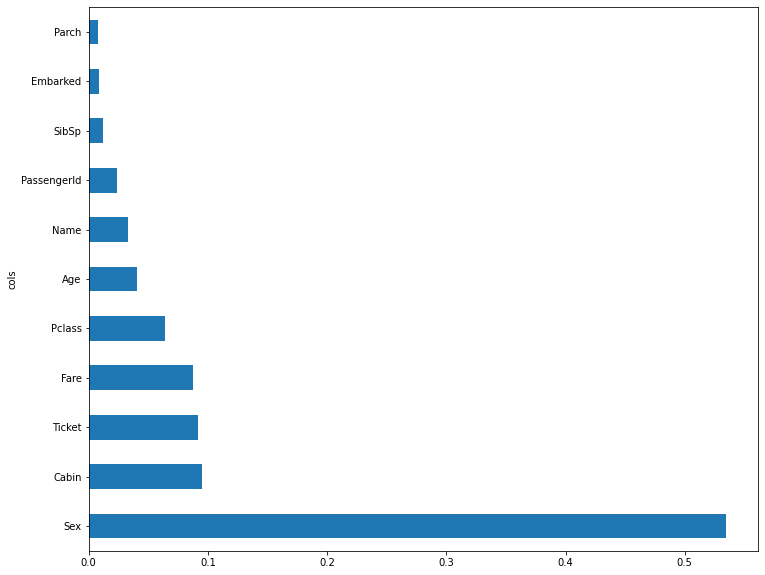

In [425]:
plot_fi(rf_fea_Imp)

### Remove low importance variables

In [426]:
to_keep = rf_fea_Imp[rf_fea_Imp.imp>0].cols
to_keep

2             Sex
6           Cabin
5          Ticket
10           Fare
0          Pclass
9             Age
1            Name
8     PassengerId
3           SibSp
7        Embarked
4           Parch
Name: cols, dtype: object

In [427]:
train_xs_imp = train_xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [428]:
train_xs_imp.columns

Index(['Sex', 'Cabin', 'Ticket', 'Fare', 'Pclass', 'Age', 'Name',
       'PassengerId', 'SibSp', 'Embarked', 'Parch'],
      dtype='object')

In [429]:
m = rf(train_xs_imp, train_y)

In [430]:
m.oob_score_

0.8061797752808989

In [431]:
rf_clf_y_pred = m.predict(valid_xs_imp)
rf_clf_y_pred.shape

(179,)

In [432]:
accuracy_score(valid_y,rf_clf_y_pred) #slight improvement

0.8268156424581006

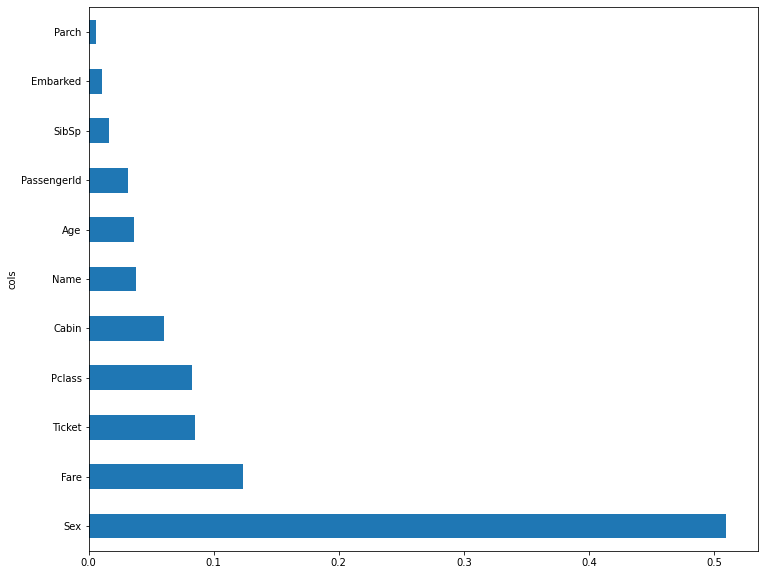

In [433]:
plot_fi(rf_feature_importance(m, train_xs_imp))

### Remove redundant features

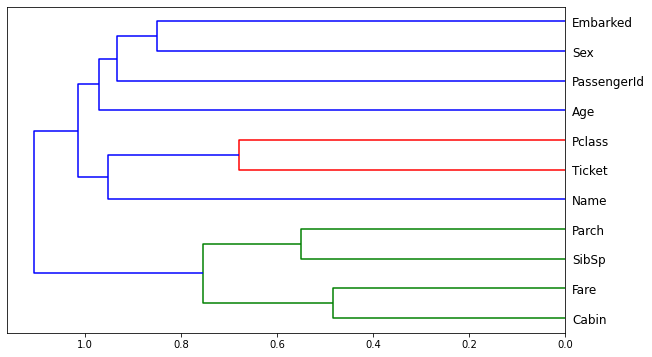

In [434]:
cluster_columns(train_xs_imp)

In [435]:
from scipy.stats import spearmanr

#### Cabin and Fare are highly correlated; Pclass and Ticket are highly correlated

In [436]:
spearmanr(train_xs_imp.Age, train_xs_imp.Cabin),spearmanr(train_xs_imp.Age, train_xs_imp.Fare),spearmanr(train_xs_imp.Cabin, train_xs_imp.Fare)

(SpearmanrResult(correlation=0.25849329562535794, pvalue=2.4745538851831035e-12),
 SpearmanrResult(correlation=0.15452275027129658, pvalue=3.460484794227819e-05),
 SpearmanrResult(correlation=0.5157877502894294, pvalue=1.192198864155056e-49))

In [437]:
spearmanr(train_xs_imp.Sex, train_xs_imp.Pclass),spearmanr(train_xs_imp.Sex, train_xs_imp.Ticket),spearmanr(train_xs_imp.Ticket, train_xs_imp.Pclass)

(SpearmanrResult(correlation=0.12139605707246569, pvalue=0.0011721572319685221),
 SpearmanrResult(correlation=0.03913998151436445, pvalue=0.29697163359932033),
 SpearmanrResult(correlation=0.32086632504622453, pvalue=1.6356477656510248e-18))

In [438]:
def get_oob(xs,y):
  clf = RandomForestClassifier(n_estimators=40, min_samples_leaf=15,max_features=0.5, n_jobs=-1, oob_score=True,random_state=42)
  clf.fit(xs, y)
  return clf.oob_score_

In [439]:
get_oob(train_xs_imp,train_y)

0.8061797752808989

#### Drop Cabin and Ticket won't really affect the OOB error.

In [440]:
{c: get_oob(train_xs_imp.drop(c, axis=1), train_y) for c in to_keep}

{'Age': 0.7949438202247191,
 'Cabin': 0.8019662921348315,
 'Embarked': 0.8047752808988764,
 'Fare': 0.7963483146067416,
 'Name': 0.8033707865168539,
 'Parch': 0.8047752808988764,
 'PassengerId': 0.8075842696629213,
 'Pclass': 0.7963483146067416,
 'Sex': 0.7219101123595506,
 'SibSp': 0.797752808988764,
 'Ticket': 0.7963483146067416}

In [441]:
to_drop = ['Cabin','Ticket','Parch']

In [442]:
get_oob(train_xs_imp.drop(to_drop, axis=1), train_y) 

0.7907303370786517

In [443]:
train_xs_final = train_xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis =1)

In [444]:
valid_xs_final.columns

Index(['Sex', 'Fare', 'Pclass', 'Age', 'Name', 'PassengerId', 'SibSp',
       'Embarked'],
      dtype='object')

In [445]:
path= Path()
path

Path('.')

In [446]:
save_pickle(path/'train_xs_final.pkl', train_xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

### Final model

In [447]:
rf_clf = rf(train_xs_final, train_y)

In [448]:
rf_clf_y_pred = rf_clf.predict(valid_xs_final)

In [449]:
accuracy_score(valid_y,rf_clf_y_pred) #no improvement?

0.8044692737430168

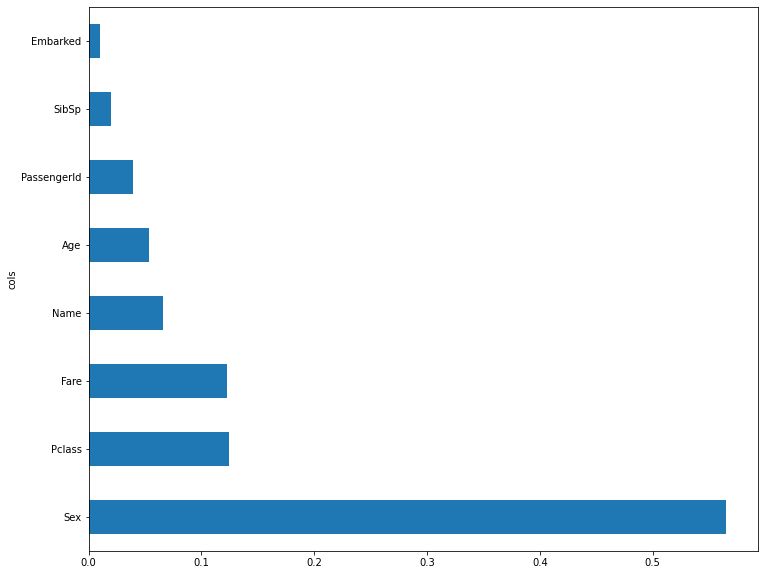

In [450]:
plot_fi(rf_feature_importance(rf_clf, valid_xs_final))

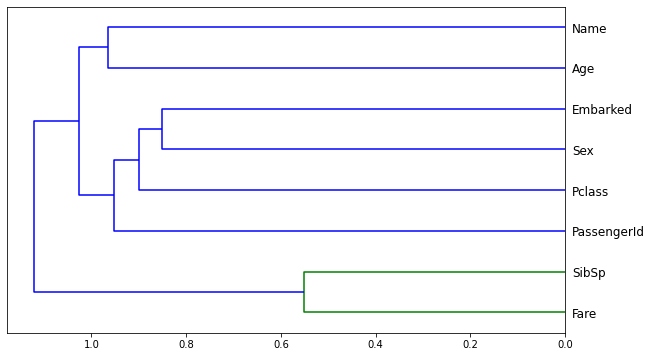

In [451]:
cluster_columns(train_xs_final)

### Partial Dependence

In [452]:
from sklearn.inspection import plot_partial_dependence

In [453]:
list(valid_xs_final.columns)

['Sex', 'Fare', 'Pclass', 'Age', 'Name', 'PassengerId', 'SibSp', 'Embarked']

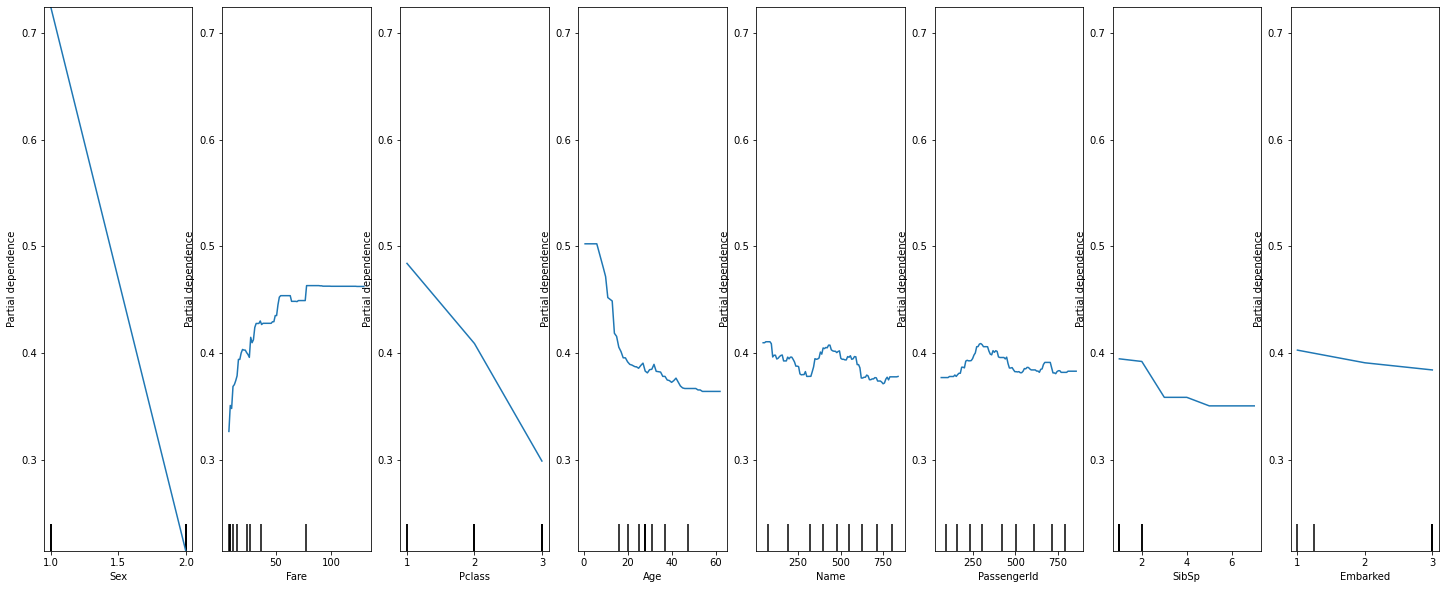

In [454]:
fig, ax  =plt.subplots(nrows=1,ncols=len(list(valid_xs_final.columns)), figsize = (25,10))
plot_partial_dependence(rf_clf, valid_xs_final,features=list(valid_xs_final.columns), ax=ax)

In [455]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [456]:
row = valid_xs_final.iloc[:5]

In [457]:
row.values # each row is each sample, columns are the sex, pclass, fare, age

array([[  2.    ,  10.5   ,   2.    ,  19.    , 532.    , 227.    ,   1.    ,   3.    ],
       [  1.    , 227.525 ,   1.    ,  18.    ,  46.    , 701.    ,   2.    ,   1.    ],
       [  2.    ,  26.    ,   2.    ,  46.    , 525.    , 398.    ,   1.    ,   3.    ],
       [  2.    ,   8.4042,   3.    ,  42.    , 612.    , 198.    ,   1.    ,   3.    ],
       [  2.    ,   7.75  ,   3.    ,  28.    , 517.    , 829.    ,   1.    ,   2.    ]], dtype=float32)

In [458]:
prediction, bias, contribuitons = treeinterpreter.predict(rf_clf, row.values)

In [459]:
final_cols = valid_xs_final.columns
final_cols

Index(['Sex', 'Fare', 'Pclass', 'Age', 'Name', 'PassengerId', 'SibSp',
       'Embarked'],
      dtype='object')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

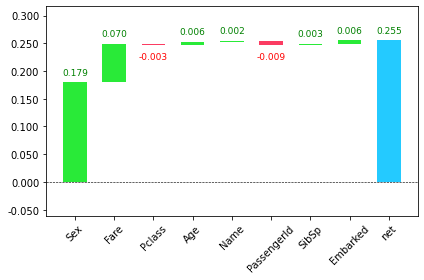

In [460]:
waterfall(valid_xs_final.columns, contribuitons[0,:,0],rotation_value=45, formatting='{:,.3f}')

### Check out-of-domain data (if any differences between training and validation data).

In [461]:
#combine training and val data, create a dependent variable (0 if is training data, 1 if is val data).
df_dom = pd.concat([train_xs_final, valid_xs_final])

In [462]:
is_valid = np.array([0] * len(train_xs_final) + [1] * len(valid_xs_final))

In [463]:
m2 = rf(df_dom, is_valid)
rf_feature_importance(m2, df_dom)

,cols,imp
4,Name,0.276218
5,PassengerId,0.274016
1,Fare,0.175619
3,Age,0.156764
2,Pclass,0.038057
6,SibSp,0.033505
7,Embarked,0.029398
0,Sex,0.016423


In [464]:
print('orig', accuracy_score(valid_y,rf_clf_y_pred))
for c in final_cols:
  m = rf(train_xs_final.drop(c,axis=1), train_y)
  print(c, accuracy_score(valid_y,m.predict(valid_xs_final.drop(c,axis=1))))

orig 0.8044692737430168
Sex 0.7486033519553073
Fare 0.8100558659217877
Pclass 0.770949720670391
Age 0.8100558659217877
Name 0.8156424581005587
PassengerId 0.8100558659217877
SibSp 0.8268156424581006
Embarked 0.8156424581005587


## Final test data prediction

In [465]:
test_df = pd.read_csv("data/test.csv")
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [466]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [467]:
fare_med_train = train_xs[['Fare']].median()
test_df[['Fare']] = test_df[['Fare']].fillna(value =fare_med_train)
test_df[['Cabin']] = test_df[['Cabin']].fillna(value =0)

https://docs.fast.ai/tabular.core.html#Integration-example

In [468]:
to_tst = to.new(test_df)
to_tst.process()
to_tst.items.head()

,PassengerId,Pclass,Name,Sex,...,Ticket,Fare,Cabin,Embarked
0,892,3,434,2,...,0,7.8292,0,2
1,893,3,0,1,...,0,7.0000,0,3
2,894,2,0,2,...,0,9.6875,0,2
3,895,3,0,2,...,0,8.6625,0,3
4,896,3,0,1,...,252,12.2875,0,3


In [469]:
to_tst = to_tst[list(valid_xs_final.columns)]

In [470]:
pred_test = rf_clf.predict(to_tst)

In [471]:
test_df['Survived'] = pred_test

In [472]:
test_pred = test_df[['PassengerId','Survived']]
test_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [473]:
test_pred.to_csv("Titanic_Kaggle_RF_test_pred_"+today+".csv", index=False)

## Neural Network

In [489]:
df_nn = pd.read_csv("data/train.csv",low_memory=False)
df_nn_final = df_nn[list(valid_xs_final.columns) + [dep_var]]
df_nn_final.columns

Index(['Sex', 'Fare', 'Pclass', 'Age', 'Name', 'PassengerId', 'SibSp',
       'Embarked', 'Survived'],
      dtype='object')

In [490]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [491]:
df_nn_final[cat_nn].nunique()

Sex              2
Pclass           3
Name           891
PassengerId    891
SibSp            7
Embarked         3
dtype: int64

In [492]:
df_nn_final[cont_nn].nunique()

Fare    248
Age      88
dtype: int64

In [493]:
procs_nn = [Categorify, FillMissing(add_col=False), Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var, y_block = CategoryBlock())

In [494]:
dls = to_nn.dataloaders(bs=256)

In [529]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.0030199517495930195)

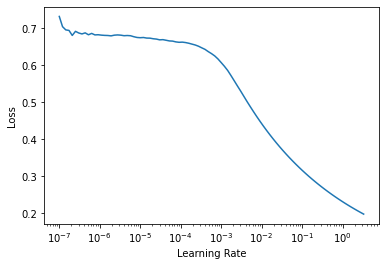

In [530]:
learn.lr_find()

In [533]:
learn.fit_one_cycle(6,lr_max=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,1.035137,1.189385,0.351955,00:00
1,3.064859,37.004822,0.709497,00:00
2,4.266628,2.991059,0.743017,00:00
3,3.785834,1.950296,0.821229,00:00
4,3.501973,1.915266,0.821229,00:00
5,3.056981,1.774414,0.821229,00:00


In [535]:
learn.save("Titanic_NN_"+today)

Path('models/Titanic_NN_May05_21.pth')

In [ ]:
# test_nn = TabularPandas(test_df, procs_nn, cat_nn, cont_nn, 
#                       splits=None, y_names=None, y_block = CategoryBlock())
# test_dls = test_nn.dataloaders(bs=256)
# test_dls

In [546]:
test_dls = learn.dls.test_dl(to_tst, bs=256) # apply transforms
preds_nn,  *_ = learn.get_preds(dl=test_dls) # get prediction

In [548]:
labels = np.argmax(preds_nn, 1)

In [549]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,


In [550]:
test_pred_nn = test_df.copy()

In [551]:
test_pred_nn['Survived'] = labels

In [552]:
test_pred_nn[['PassengerId','Survived']].to_csv("Titanic_Kaggle_NN_test_pred_"+today+".csv", index=False)